<a href="https://colab.research.google.com/github/youssefsalah224/codesoft-intern/blob/main/spam_sms_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
import nltk
from wordcloud import WordCloud
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4540,ham,Hiya. How was last night? I've been naughty an...,NaN,NaN,NaN
5351,ham,Yup it's at paragon... I havent decided whethe...,NaN,NaN,NaN
4553,ham,Try to do something dear. You read something f...,NaN,NaN,NaN
403,ham,None of that's happening til you get here though,NaN,NaN,NaN
3802,ham,Yup song bro. No creative. Neva test quality. ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 unusefull colmns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
df.sample(5)

,v1,v2
3390,ham,"I'm in a meeting, call me later at"
4587,ham,I wanted to wish you a Happy New Year and I wa...
3823,ham,I miss you so much I'm so desparate I have rec...
1364,ham,Hey i will be really pretty late... You want t...
5332,ham,I think steyn surely get one wicket:)


In [ ]:
# renaming the columns
df.rename(columns = {'v1' : 'spam', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
4413,ham,How stupid to say that i challenge god.You don...
2590,ham,Lol I have to take it. member how I said my au...
4823,ham,Not thought bout it... || Drink in tap & spile...
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?
1857,ham,I hate when she does this. She turns what shou...


In [ ]:

encoder = LabelEncoder()

In [ ]:
df['spam'] = encoder.fit_transform(df['spam'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove the duplicates
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['spam'].value_counts()

0    4516
1     653
Name: target, dtype: int64

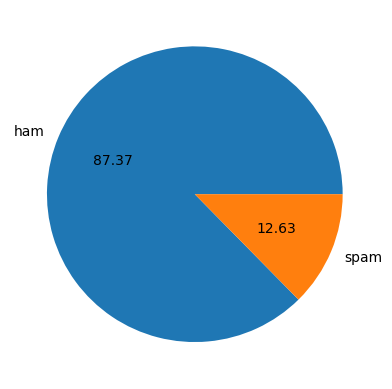

In [ ]:

plt.pie(df['spam'].value_counts(), labels = ['ham', 'spam'] , autopct = "%0.2f")
plt.show()

In [ ]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import nltk
print(nltk.data.path)


['C:\\Users\\riyau/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\riyau\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
print(df.columns)


Index(['target', 'text', 'num_characters'], dtype='object')


In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# ham
df[df['spam']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# indentifing spams
df[df['spam']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

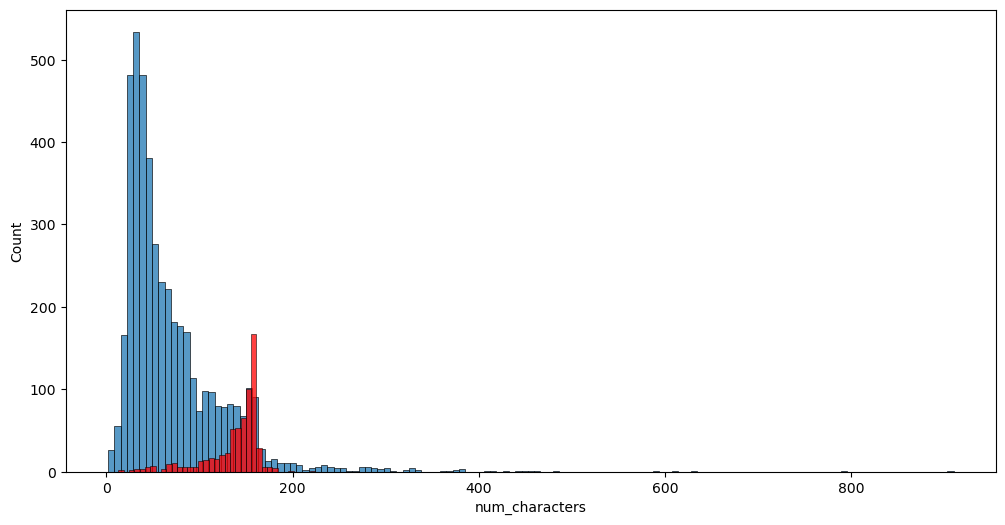

In [ ]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')



<Axes: xlabel='num_words', ylabel='Count'>

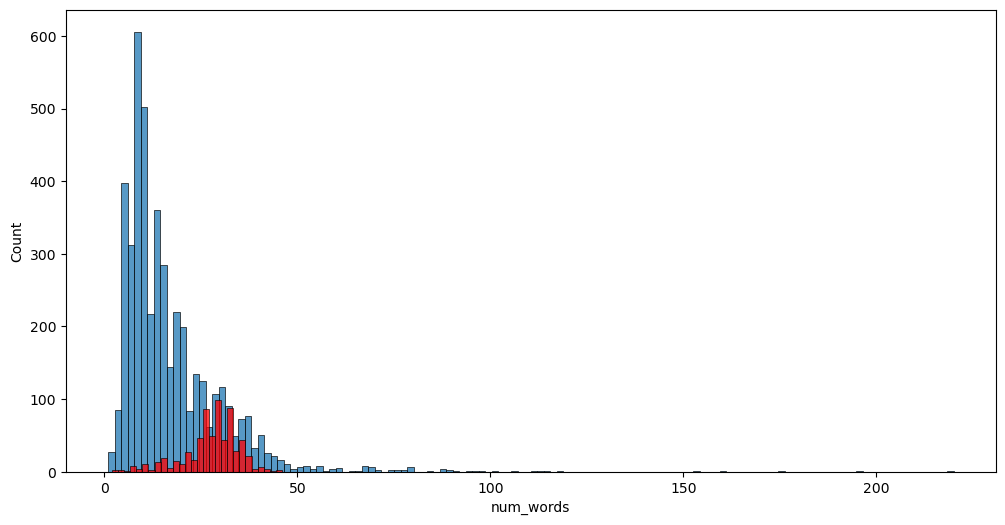

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')


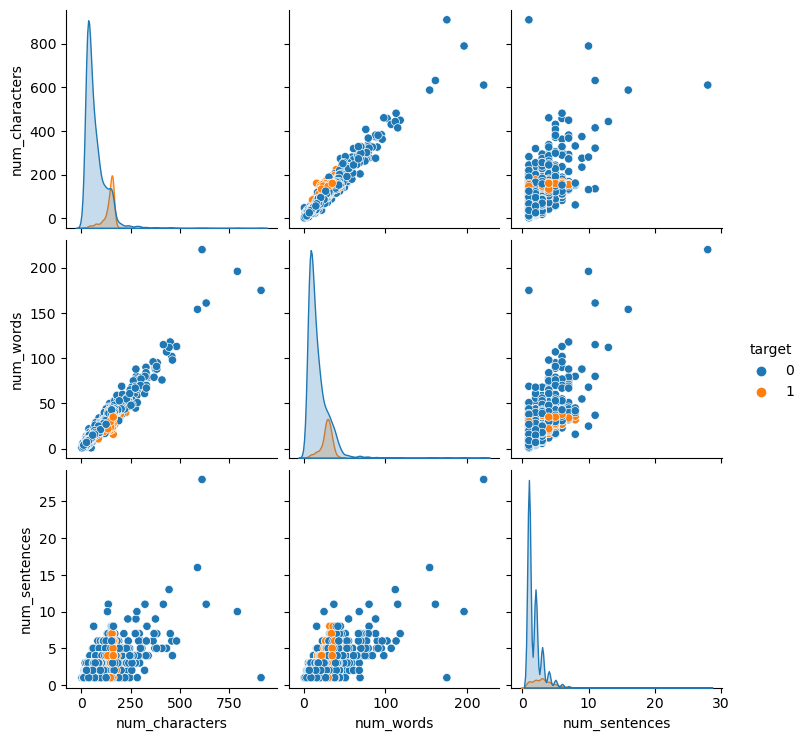

In [ ]:
sns.pairplot(df, hue = 'target')

C:\Users\riyau\AppData\Local\Temp\ipykernel_3068\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

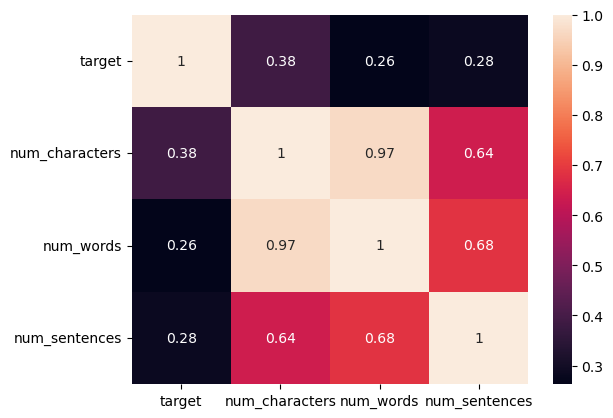

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text('I m gonna be home soon and i don t want to talk about this stuff anymore tonight, k? I ve cried enough today.')

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
wc = WordCloud(width=500, height = 500, min_font_size =10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

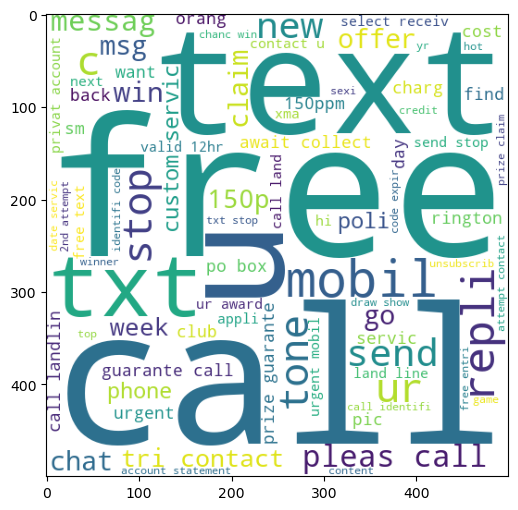

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

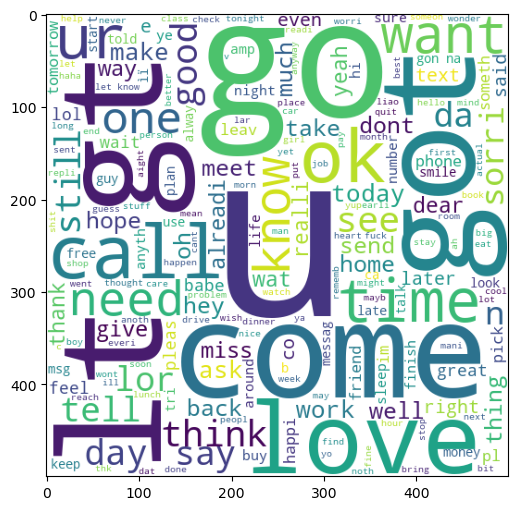

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

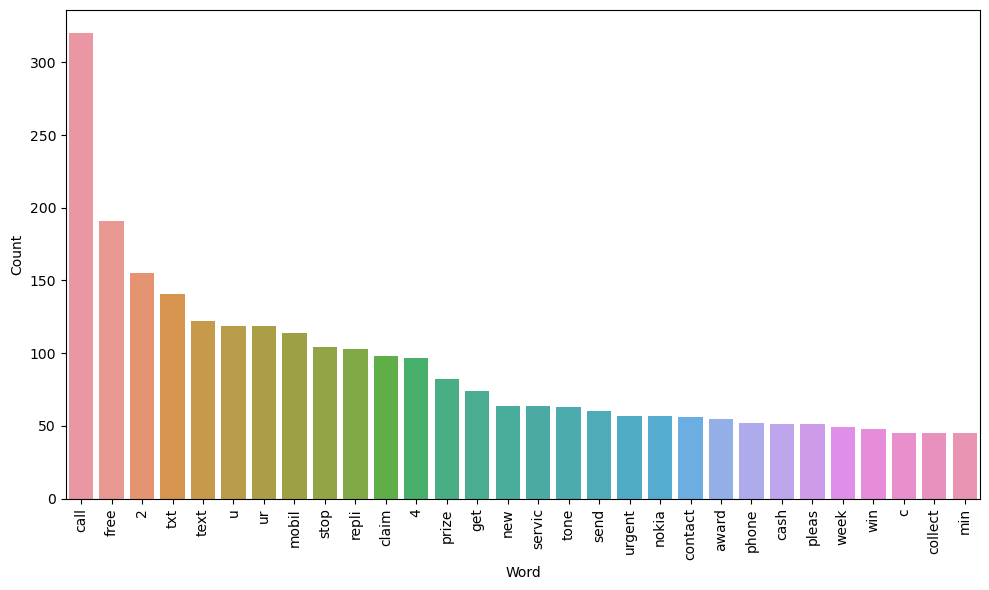

In [ ]:


word_counter = Counter(spam_corpus)
most_common_words = word_counter.most_common(30)
word_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

9939

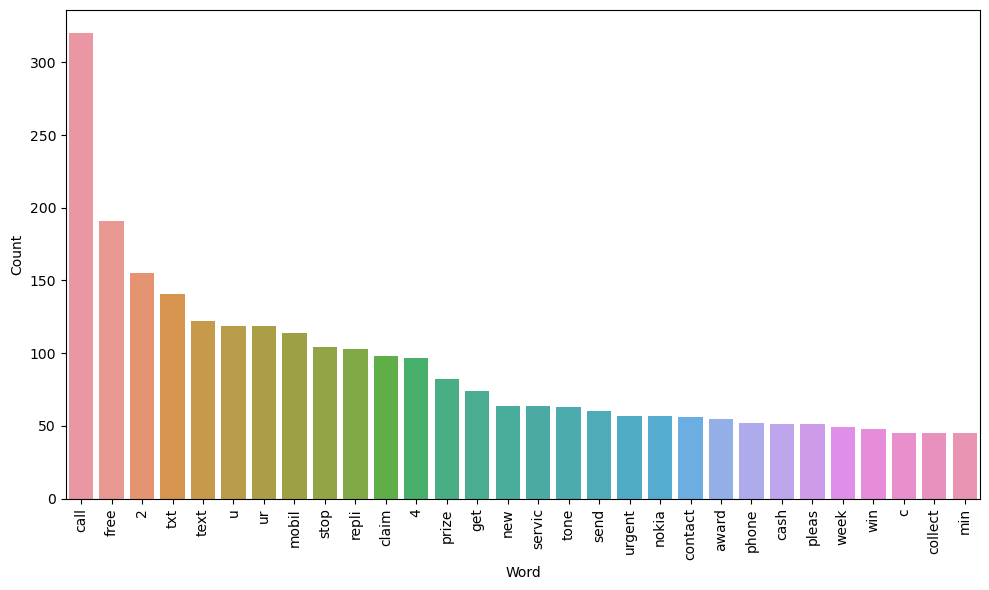

In [ ]:

word_counter = Counter(ham_corpus)
most_common_words = word_counter.most_common(30)
word_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50 , random_state =2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50 , random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [ ]:
clfs = {'SVC' :svc,'KN':knc,'NB':mnb, 'DT':dtc,'LR':lrc,'RF': rfc,'AdaBoost': abc,'BgC':bc,'ETC': etc,'GBDT': gbdt,'xgb':xgb}




In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.927466,0.811881
4,LR,0.958414,0.970297
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,BgC,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.927466
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.974855
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.957447
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.947776


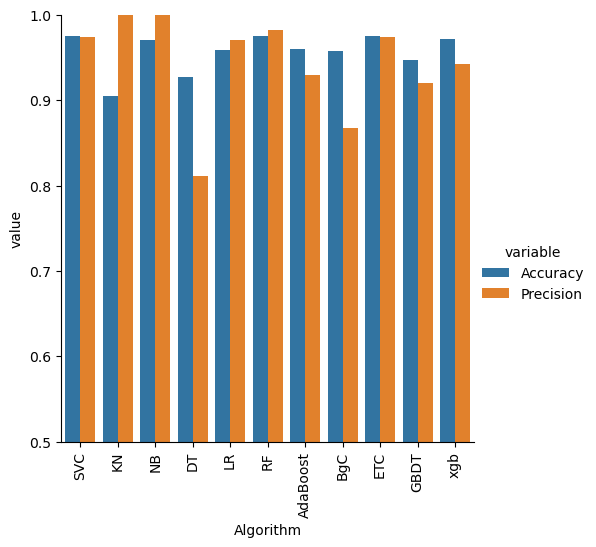

In [ ]:
sns.catplot(x = 'Algorithm' , y='value', hue ='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [ ]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000
3,DT,0.927466,0.811881,0.927466,0.811881
4,LR,0.958414,0.970297,0.958414,0.970297
5,RF,0.974855,0.982759,0.974855,0.982759
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,BgC,0.957447,0.867188,0.957447,0.867188
8,ETC,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.947776,0.920000,0.947776,0.920000


In [2]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: ignored